# Project Title

## Data Engineering Capstone Project - Immigration Data Pipeline

### Importing required Libraries for the project.

In [1]:
# Doing required imports of libraries for carrying out task.
import pandas as pd
import psycopg2
from sql_queries import airport_insert, demographic_insert, immigration_insert, temperature_insert

# Step 1: Scope the Project and Gather Data

## Scope

This projects aims to enrich the wider analysis of US immigration data with combination of other data such as demographics and temperature data.

### I94 Immigration Data

Dataset is from the US National Tourism and Trade Office [(https://travel.trade.gov/research/reports/i94/historical/2016.html)]. There's a sample file "immigration_data_sample.csv" so we can take a look at the data in csv format before reading it all in. We do not have to use the entire dataset, just use what you need to accomplish the goal you set at the beginning of the project.The Data set is provided by Udacity.

In [2]:
# Read in the US Immigration data which was provided by udacity.
i94_path = 'sas-data'
df_immigration = pd.read_parquet(i94_path)
df_immigration.head()

,cicid,i94yr,i94mon,i94cit,i94res,i94port,arrdate,i94mode,i94addr,depdate,...,entdepu,matflag,biryear,dtaddto,gender,insnum,airline,admnum,fltno,visatype
0,6.0,2016.0,4.0,692.0,692.0,XXX,20573.0,NaN,None,NaN,...,U,None,1979.0,10282016,None,None,None,1.897628e+09,None,B2
1,7.0,2016.0,4.0,254.0,276.0,ATL,20551.0,1.0,AL,NaN,...,Y,None,1991.0,D/S,M,None,None,3.736796e+09,00296,F1
2,15.0,2016.0,4.0,101.0,101.0,WAS,20545.0,1.0,MI,20691.0,...,None,M,1961.0,09302016,M,None,OS,6.666432e+08,93,B2
3,16.0,2016.0,4.0,101.0,101.0,NYC,20545.0,1.0,MA,20567.0,...,None,M,1988.0,09302016,None,None,AA,9.246846e+10,00199,B2
4,17.0,2016.0,4.0,101.0,101.0,NYC,20545.0,1.0,MA,20567.0,...,None,M,2012.0,09302016,None,None,AA,9.246846e+10,00199,B2


In [3]:
pd.options.display.max_columns = None
df_immigration.sample(5)

,cicid,i94yr,i94mon,i94cit,i94res,i94port,arrdate,i94mode,i94addr,depdate,i94bir,i94visa,count,dtadfile,visapost,occup,entdepa,entdepd,entdepu,matflag,biryear,dtaddto,gender,insnum,airline,admnum,fltno,visatype
2077067,4241822.0,2016.0,4.0,690.0,690.0,ORL,20566.0,1.0,FL,20574.0,41.0,2.0,1.0,20160422,SNT,None,G,O,None,M,1975.0,10212016,F,None,AV,9.423730e+10,00028,B2
1760784,3546127.0,2016.0,4.0,261.0,261.0,NYC,20563.0,1.0,NY,20568.0,61.0,1.0,1.0,20160419,None,None,O,O,None,M,1955.0,10182016,None,None,SV,9.395224e+10,00023,B1
995815,2035693.0,2016.0,4.0,245.0,245.0,DET,20555.0,1.0,MI,20558.0,43.0,1.0,1.0,20160411,FRN,None,G,O,None,M,1973.0,05102016,M,None,DL,9.326460e+10,00133,B1
2882323,5815319.0,2016.0,4.0,576.0,576.0,MIA,20574.0,1.0,NC,20620.0,73.0,2.0,1.0,20160430,SNS,None,G,O,None,M,1943.0,10292016,F,None,AA,9.496316e+10,01491,B2
1887902,3837069.0,2016.0,4.0,111.0,111.0,MIA,20565.0,1.0,FL,20568.0,24.0,2.0,1.0,20160421,None,None,G,O,None,M,1992.0,07192016,M,None,AF,5.654053e+10,00090,WT


### Global Temperature Data

Dataset is downloaded from Kaggle. We can read more about it here (https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data).

In [4]:
# Read in the Global temperature city wise data.
fname = 'GlobalLandTemperaturesByCity.csv'
df_temperature = pd.read_csv(fname)
df_temperature.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [5]:
df_temperature.sample(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
6863922,1832-01-01,-9.265,2.876,Serpukhov,Russia,55.45N,36.85E
4948937,1912-01-01,20.482,0.751,Morvi,India,23.31N,70.78E
7096177,1887-02-01,0.681,1.100,Solingen,Germany,50.63N,6.34E
722699,1933-07-01,25.066,0.399,Baruta,Venezuela,10.45N,66.27W
8260351,1955-09-01,17.086,0.792,Wuda,China,39.38N,106.13E


In [6]:
# find all unique country codes in temperature data to find used name for United States 
set(df_temperature["Country"].values)

{'Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Benin',
 'Bolivia',
 'Bosnia And Herzegovina',
 'Botswana',
 'Brazil',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo',
 'Congo (Democratic Republic Of The)',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czech Republic',
 "Côte D'Ivoire",
 'Denmark',
 'Djibouti',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Guatemala',
 'Guinea',
 'Guinea Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jorda

#### USA Temperature Dataset

In [7]:
usa_temperature = df_temperature[df_temperature["Country"] == "United States"]
usa_temperature.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
47555,1820-01-01,2.101,3.217,Abilene,United States,32.95N,100.53W
47556,1820-02-01,6.926,2.853,Abilene,United States,32.95N,100.53W
47557,1820-03-01,10.767,2.395,Abilene,United States,32.95N,100.53W
47558,1820-04-01,17.989,2.202,Abilene,United States,32.95N,100.53W
47559,1820-05-01,21.809,2.036,Abilene,United States,32.95N,100.53W


### U.S.A City Wise Demographic Data

Dataset is downloaded from OpenSoft. We can read more about it here (https://public.opendatasoft.com/explore/dataset/us-cities-demographics/export/).

In [8]:
# Read in the US Demographic data which was provided by udacity.
df_demographics = pd.read_csv("us-cities-demographics.csv", delimiter=";")
df_demographics.head()

,City,State,Median Age,Male Population,Female Population,Total Population,Number of Veterans,Foreign-born,Average Household Size,State Code,Race,Count
0,Silver Spring,Maryland,33.8,40601.0,41862.0,82463,1562.0,30908.0,2.60,MD,Hispanic or Latino,25924
1,Quincy,Massachusetts,41.0,44129.0,49500.0,93629,4147.0,32935.0,2.39,MA,White,58723
2,Hoover,Alabama,38.5,38040.0,46799.0,84839,4819.0,8229.0,2.58,AL,Asian,4759
3,Rancho Cucamonga,California,34.5,88127.0,87105.0,175232,5821.0,33878.0,3.18,CA,Black or African-American,24437
4,Newark,New Jersey,34.6,138040.0,143873.0,281913,5829.0,86253.0,2.73,NJ,White,76402


In [9]:
df_demographics.sample(5)

,City,State,Median Age,Male Population,Female Population,Total Population,Number of Veterans,Foreign-born,Average Household Size,State Code,Race,Count
389,Turlock,California,36.2,33190.0,39103.0,72293,3397.0,14686.0,2.76,CA,Hispanic or Latino,23559
2609,German,Maryland,34.9,41115.0,43007.0,84122,2443.0,27877.0,2.95,MD,White,43330
2079,Independence,Missouri,38.6,54348.0,62907.0,117255,10220.0,4911.0,2.33,MO,American Indian and Alaska Native,1883
2254,Elizabeth,New Jersey,34.2,65896.0,63116.0,129012,1131.0,63413.0,3.18,NJ,White,70873
301,Springfield,Massachusetts,31.8,74744.0,79592.0,154336,5723.0,16226.0,2.81,MA,American Indian and Alaska Native,2087


### Airport Code Table

Its corresponding citiies airport codes dataset (https://datahub.io/core/airport-codes#data). 

In [10]:
# Read in the Airport codes data.
df_airportcodes = pd.read_csv("airport-codes_csv.csv")
df_airportcodes.head(5)

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
0,00A,heliport,Total Rf Heliport,11.0,NaN,US,US-PA,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125"
1,00AA,small_airport,Aero B Ranch Airport,3435.0,NaN,US,US-KS,Leoti,00AA,NaN,00AA,"-101.473911, 38.704022"
2,00AK,small_airport,Lowell Field,450.0,NaN,US,US-AK,Anchor Point,00AK,NaN,00AK,"-151.695999146, 59.94919968"
3,00AL,small_airport,Epps Airpark,820.0,NaN,US,US-AL,Harvest,00AL,NaN,00AL,"-86.77030181884766, 34.86479949951172"
4,00AR,closed,Newport Hospital & Clinic Heliport,237.0,NaN,US,US-AR,Newport,NaN,NaN,NaN,"-91.254898, 35.6087"


In [11]:
df_airportcodes.sample(5)

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
33283,MM14,closed,Rio Verde Airport,3281.0,NaN,MX,MX-SLP,Rio Verde,MM14,NaN,NaN,"-100.0077, 21.9631"
19874,FADN,small_airport,Air Force Base Durban,33.0,AF,ZA,ZA-NL,Durban,FADN,NaN,NaN,"30.9505, -29.9701"
38652,PH-0083,heliport,Manila Marriott Hotel Heliport,NaN,AS,PH,PH-U-A,Pasay,NaN,NaN,NaN,"121.019369, 14.520417"
53331,YGGI,small_airport,Goolgowi Airport,NaN,OC,AU,AU-NSW,NaN,YGGI,NaN,NaN,"145.7169952392578, -34"
9291,8OK1,small_airport,Warbonnet Airport,1335.0,NaN,US,US-OK,Blanchard,8OK1,NaN,8OK1,"-97.71080017089844, 35.16830062866211"


# Step 2: Explore and Assess the Data

Explore the Data of US Immigration and identifying data quality issues and looking out for more insides.

In [12]:
df_immigration.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3096313 entries, 0 to 3096312
Data columns (total 28 columns):
 #   Column    Dtype  
---  ------    -----  
 0   cicid     float64
 1   i94yr     float64
 2   i94mon    float64
 3   i94cit    float64
 4   i94res    float64
 5   i94port   object 
 6   arrdate   float64
 7   i94mode   float64
 8   i94addr   object 
 9   depdate   float64
 10  i94bir    float64
 11  i94visa   float64
 12  count     float64
 13  dtadfile  object 
 14  visapost  object 
 15  occup     object 
 16  entdepa   object 
 17  entdepd   object 
 18  entdepu   object 
 19  matflag   object 
 20  biryear   float64
 21  dtaddto   object 
 22  gender    object 
 23  insnum    object 
 24  airline   object 
 25  admnum    float64
 26  fltno     object 
 27  visatype  object 
dtypes: float64(13), object(15)
memory usage: 661.4+ MB


In [13]:
df_immigration.describe()

,cicid,i94yr,i94mon,i94cit,i94res,arrdate,i94mode,depdate,i94bir,i94visa,count,biryear,admnum
count,3.096313e+06,3096313.0,3096313.0,3.096313e+06,3.096313e+06,3.096313e+06,3.096074e+06,2.953856e+06,3.095511e+06,3.096313e+06,3096313.0,3.095511e+06,3.096313e+06
mean,3.078652e+06,2016.0,4.0,3.049069e+02,3.032838e+02,2.055985e+04,1.073690e+00,2.057395e+04,4.176761e+01,1.845393e+00,1.0,1.974232e+03,7.082885e+10
std,1.763278e+06,0.0,0.0,2.100269e+02,2.085832e+02,8.777339e+00,5.158963e-01,2.935697e+01,1.742026e+01,3.983910e-01,0.0,1.742026e+01,2.215442e+10
min,6.000000e+00,2016.0,4.0,1.010000e+02,1.010000e+02,2.054500e+04,1.000000e+00,1.517600e+04,-3.000000e+00,1.000000e+00,1.0,1.902000e+03,0.000000e+00
25%,1.577790e+06,2016.0,4.0,1.350000e+02,1.310000e+02,2.055200e+04,1.000000e+00,2.056100e+04,3.000000e+01,2.000000e+00,1.0,1.962000e+03,5.603523e+10
50%,3.103507e+06,2016.0,4.0,2.130000e+02,2.130000e+02,2.056000e+04,1.000000e+00,2.057000e+04,4.100000e+01,2.000000e+00,1.0,1.975000e+03,5.936094e+10
75%,4.654341e+06,2016.0,4.0,5.120000e+02,5.040000e+02,2.056700e+04,1.000000e+00,2.057900e+04,5.400000e+01,2.000000e+00,1.0,1.986000e+03,9.350987e+10
max,6.102785e+06,2016.0,4.0,9.990000e+02,7.600000e+02,2.057400e+04,9.000000e+00,4.542700e+04,1.140000e+02,3.000000e+00,1.0,2.019000e+03,9.991557e+10


Explore the Data of US city temperature and identifying data quality issues and looking out for more insides.

In [14]:
usa_temperature.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,661524.000000,661524.00000
mean,13.949335,1.08955
std,9.173337,1.15068
min,-25.163000,0.04000
25%,7.787000,0.30000
50%,14.922000,0.52400
75%,21.081000,1.64600
max,34.379000,10.51900


In [15]:
usa_temperature.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687289 entries, 47555 to 8439246
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             687289 non-null  object 
 1   AverageTemperature             661524 non-null  float64
 2   AverageTemperatureUncertainty  661524 non-null  float64
 3   City                           687289 non-null  object 
 4   Country                        687289 non-null  object 
 5   Latitude                       687289 non-null  object 
 6   Longitude                      687289 non-null  object 
dtypes: float64(2), object(5)
memory usage: 41.9+ MB


Explore the Data of airport city codes and identifying data quality issues and looking out for more insides.

In [16]:
df_airportcodes.describe()

,elevation_ft
count,48069.000000
mean,1240.789677
std,1602.363459
min,-1266.000000
25%,205.000000
50%,718.000000
75%,1497.000000
max,22000.000000


In [17]:
df_airportcodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55075 entries, 0 to 55074
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ident         55075 non-null  object 
 1   type          55075 non-null  object 
 2   name          55075 non-null  object 
 3   elevation_ft  48069 non-null  float64
 4   continent     27356 non-null  object 
 5   iso_country   54828 non-null  object 
 6   iso_region    55075 non-null  object 
 7   municipality  49399 non-null  object 
 8   gps_code      41030 non-null  object 
 9   iata_code     9189 non-null   object 
 10  local_code    28686 non-null  object 
 11  coordinates   55075 non-null  object 
dtypes: float64(1), object(11)
memory usage: 5.0+ MB


Explore the Data of US Demographic of cities and identifying data quality issues and looking out for more insides.

In [18]:
df_demographics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   City                    2891 non-null   object 
 1   State                   2891 non-null   object 
 2   Median Age              2891 non-null   float64
 3   Male Population         2888 non-null   float64
 4   Female Population       2888 non-null   float64
 5   Total Population        2891 non-null   int64  
 6   Number of Veterans      2878 non-null   float64
 7   Foreign-born            2878 non-null   float64
 8   Average Household Size  2875 non-null   float64
 9   State Code              2891 non-null   object 
 10  Race                    2891 non-null   object 
 11  Count                   2891 non-null   int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 271.2+ KB


In [19]:
df_demographics.describe()

,Median Age,Male Population,Female Population,Total Population,Number of Veterans,Foreign-born,Average Household Size,Count
count,2891.000000,2.888000e+03,2.888000e+03,2.891000e+03,2878.000000,2.878000e+03,2875.000000,2.891000e+03
mean,35.494881,9.732843e+04,1.017696e+05,1.989668e+05,9367.832523,4.065360e+04,2.742543,4.896377e+04
std,4.401617,2.162999e+05,2.315646e+05,4.475559e+05,13211.219924,1.557491e+05,0.433291,1.443856e+05
min,22.900000,2.928100e+04,2.734800e+04,6.321500e+04,416.000000,8.610000e+02,2.000000,9.800000e+01
25%,32.800000,3.928900e+04,4.122700e+04,8.042900e+04,3739.000000,9.224000e+03,2.430000,3.435000e+03
50%,35.300000,5.234100e+04,5.380900e+04,1.067820e+05,5397.000000,1.882200e+04,2.650000,1.378000e+04
75%,38.000000,8.664175e+04,8.960400e+04,1.752320e+05,9368.000000,3.397175e+04,2.950000,5.444700e+04
max,70.500000,4.081698e+06,4.468707e+06,8.550405e+06,156961.000000,3.212500e+06,4.980000,3.835726e+06


## Cleaning Steps

Necessary step towards cleaning the data of US Immigration Dataset.

In [20]:
# Get port locations from SAS text file
with open("./I94_SAS_Labels_Descriptions.SAS") as f:
    content = f.readlines()
content = [x.strip() for x in content]
ports = content[302:962]
splitted_ports = [port.split("=") for port in ports]
port_codes = [x[0].replace("'","").strip() for x in splitted_ports]
port_locations = [x[1].replace("'","").strip() for x in splitted_ports]
port_cities = [x.split(",")[0] for x in port_locations]
port_states = [x.split(",")[-1] for x in port_locations]
df_port_locations = pd.DataFrame({"port_code" : port_codes, "port_city": port_cities, "port_state": port_states})
df_port_locations.head(20)

,port_code,port_city,port_state
0,ALC,ALCAN,AK
1,ANC,ANCHORAGE,AK
2,BAR,BAKER AAF - BAKER ISLAND,AK
3,DAC,DALTONS CACHE,AK
4,PIZ,DEW STATION PT LAY DEW,AK
5,DTH,DUTCH HARBOR,AK
6,EGL,EAGLE,AK
7,FRB,FAIRBANKS,AK
8,HOM,HOMER,AK
9,HYD,HYDER,AK


In [21]:
# print first and last element in dict to check if all lines in file are covered
print(f"First port in SAS file: {df_port_locations['port_city'].values[0]}, last port {df_port_locations['port_city'].values[-1]}")
irregular_ports_df = df_port_locations[df_port_locations["port_city"] == df_port_locations["port_state"]]
irregular_ports = list(set(irregular_ports_df["port_code"].values))
print(irregular_ports)

First port in SAS file: ALCAN, last port No PORT Code (OSN)
['RYY', 'WTR', 'JFA', 'CXO', 'BUS', 'MAA', 'NK', 'AKT', 'BKF', 'AG', 'A2A', '888', 'SP0', 'PLB', 'Y62', 'XXX', 'OSN', 'ADU', 'AUH', 'PHF', 'WA5', 'PFN', 'CHN', 'FTB', '060', 'W55', 'JSJ', 'IAG', 'OTS', 'NYL', 'JBQ', 'EGE', 'X96', 'VMB', 'T01', 'DAY', 'SCH', 'JIG', 'JMZ', 'PHN', 'UNK', 'MTH', 'FSC', 'X44', '.GA', 'ASI', 'CLX', 'GAC', 'NC8', 'XNA', 'WAS', 'OLM', 'YGF', 'OGS', 'ISP', 'HRL', 'STN', 'NGL', 'SUS', 'MAP', 'OAI', 'GMT', 'FRG', 'LIT', 'CP', 'ZZZ', 'BCM', 'ATW', 'DRV', 'TIW', '74S', 'PCW', '5T6', 'CPX', 'GPI', 'DEC', 'AMT']


In [22]:
# drop all irregular ports from i94 data
print(f"i94 data contains {len(df_immigration)} rows before cleaning.")
df_i94_filtered = df_immigration[~df_immigration["i94port"].isin(irregular_ports)]
print(f"i94 data contains {len(df_i94_filtered)} rows after removing irregular ports.")
df_i94_filtered.drop(columns=["insnum", "entdepu", "occup", "visapost"], inplace=True)
df_i94_filtered.dropna(inplace=True)
print(f"i94 data contains {len(df_i94_filtered)} rows after removing NaN values.")

i94 data contains 3096313 rows before cleaning.
i94 data contains 2995590 rows after removing irregular ports.


C:\anaconda\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


i94 data contains 2306750 rows after removing NaN values.


<ipython-input-22-799e8bbffed8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_i94_filtered.dropna(inplace=True)


Step towards cleaning the data of US Temperature Dataset, by taking Null sets.

In [23]:
# clear missing temperature values
usa_temperature.dropna(inplace=True)

<ipython-input-23-8e7d43ff5818>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  usa_temperature.dropna(inplace=True)


Step towards cleaning the data of Airport Codes Dataset, by taking Duplicates from sets.

In [24]:
df_airportcodes.drop_duplicates(subset=['iata_code'], inplace=True)
df_airportcodes.head(5)

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates
0,00A,heliport,Total Rf Heliport,11.0,NaN,US,US-PA,Bensalem,00A,NaN,00A,"-74.93360137939453, 40.07080078125"
223,03N,small_airport,Utirik Airport,4.0,OC,MH,MH-UTI,Utirik Island,K03N,UTK,03N,"169.852005, 11.222"
440,07FA,small_airport,Ocean Reef Club Airport,8.0,NaN,US,US-FL,Key Largo,07FA,OCA,07FA,"-80.274803161621, 25.325399398804"
594,0AK,small_airport,Pilot Station Airport,305.0,NaN,US,US-AK,Pilot Station,NaN,PQS,0AK,"-162.899994, 61.934601"
673,0CO2,small_airport,Crested Butte Airpark,8980.0,NaN,US,US-CO,Crested Butte,0CO2,CSE,0CO2,"-106.928341, 38.851918"


# Step 3: Define the Data Model

## Conceptual Data Model

The conceptual data model and explain why we chose that model

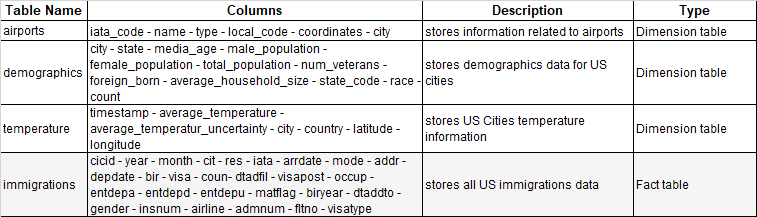

## Mapping Out Data Pipelines

The steps required for data pipeline into the selected data model is as:

1. Create tables by executing `create_tables.py`.
2. Join city to airports data.
3. Insert data.

# Step 4: Run Pipelines to Model the Data

### Create the data model

#### Building the data pipelines to create the data model.

Establishing the connection with PosgreSQL version12, I used opensource version.

In [25]:
# After running create_tables.py, insert the data into the database
conn = psycopg2.connect("host=localhost dbname=nagamohan user=postgres password=Mudu#1977")
cur = conn.cursor()

Creating by executing the following command.

In [26]:
%run sql_queries.py

Joining the Cities to the Airport data

In [27]:
df_airportcodes = df_airportcodes.merge(df_port_locations, left_on="iata_code", right_on="port_code")
df_airportcodes.head()

,ident,type,name,elevation_ft,continent,iso_country,iso_region,municipality,gps_code,iata_code,local_code,coordinates,port_code,port_city,port_state
0,57A,seaplane_base,Tokeen Seaplane Base,NaN,NaN,US,US-AK,Tokeen,57A,TKI,57A,"-133.32699585, 55.9370994568",TKI,TOKEEN,AK
1,5Z9,seaplane_base,Lake Brooks Seaplane Base,36.0,NaN,US,US-AK,Katmai National Park,5Z9,BKF,5Z9,"-155.77699279785, 58.554798126221",BKF,No PORT Code (BKF),No PORT Code (BKF)
2,89NY,small_airport,Maxson Airfield,340.0,NaN,US,US-NY,Alexandria Bay,89NY,AXB,89NY,"-75.90034, 44.312002",AXB,ALEXANDRIA BAY,NY
3,AGGF,small_airport,Fera/Maringe Airport,NaN,OC,SB,SB-IS,Fera Island,AGGF,FRE,NaN,"159.576996, -8.1075",FRE,FRESNO,CA
4,ANZ,small_airport,Angus Downs Airport,1724.0,OC,AU,AU-NT,Angus Downs Station,NaN,ANZ,NaN,"132.2748, -25.0325",ANZ,ANZALDUAS,TX


In [28]:
df_airportcodes.drop(columns=["port_code"], inplace=True)

In [30]:
df_airportcodes = df_airportcodes[["iata_code", "name", "type", "local_code", "coordinates", "port_city", "elevation_ft", "continent", "iso_country", "iso_region", "municipality", "gps_code"]]
df_airportcodes

,iata_code,name,type,local_code,coordinates,port_city,elevation_ft,continent,iso_country,iso_region,municipality,gps_code
0,TKI,Tokeen Seaplane Base,seaplane_base,57A,"-133.32699585, 55.9370994568",TOKEEN,NaN,NaN,US,US-AK,Tokeen,57A
1,BKF,Lake Brooks Seaplane Base,seaplane_base,5Z9,"-155.77699279785, 58.554798126221",No PORT Code (BKF),36.0,NaN,US,US-AK,Katmai National Park,5Z9
2,AXB,Maxson Airfield,small_airport,89NY,"-75.90034, 44.312002",ALEXANDRIA BAY,340.0,NaN,US,US-NY,Alexandria Bay,89NY
3,FRE,Fera/Maringe Airport,small_airport,NaN,"159.576996, -8.1075",FRESNO,NaN,OC,SB,SB-IS,Fera Island,AGGF
4,ANZ,Angus Downs Airport,small_airport,NaN,"132.2748, -25.0325",ANZALDUAS,1724.0,OC,AU,AU-NT,Angus Downs Station,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
545,BAR,Qionghai Bo'ao Airport,medium_airport,NaN,"110.454775, 19.13824",BAKER AAF - BAKER ISLAND,30.0,AS,CN,CN-46,Qionghai,ZJQH
546,SHA,Shanghai Hongqiao International Airport,large_airport,NaN,"121.33599853515625, 31.197900772094727",SHANNON,10.0,AS,CN,CN-31,Shanghai,ZSSS
547,LLB,Libo Airport,small_airport,NaN,"107.961667, 25.4525",JUAREZ-LINCOLN BRIDGE,NaN,AS,CN,CN-52,Libo County,ZULB
548,LIA,Liangping Airport,small_airport,NaN,"107.786003, 30.679399",LITTLE ROCK,NaN,AS,CN,CN-50,Liangping,ZULP


In [31]:
%run create_tables.py

ObjectInUse: database "nagamohan" is being accessed by other users
DETAIL:  There is 1 other session using the database.


Loading the data to the PostgreSQL 12 Database of table Airports.

In [ ]:
for index, row in df_airportcodes.iterrows():
    cur.execute(airport_insert, list(row.values))
    conn.commit()

Loading the data to the PostgreSQL 13 Database of table Demographics.

In [ ]:
for index, row in df_demographics.iterrows():
    cur.execute(demographic_insert, list(row.values))
    conn.commit()

Loading the data to the PostgreSQL 13 Database of table Immigrations.

In [ ]:
for index, row in df_i94_filtered.iterrows():
    cur.execute(immigration_insert, list(row.values))
    conn.commit()

Loading the data to the PostgreSQL 13 Database of table Temperature.

In [ ]:
for index, row in usa_temperature.iterrows():
    cur.execute(temperature_insert, list(row.values))
    conn.commit()

## Data Quality Checks

Data quality checks will be performed to ensure that the pipeline is runing as expected. These could include:

Integrity constraints on the relational database (e.g., unique key, data type, etc.)

Unit tests for the scripts to ensure they are doing the right thing

Source/Count checks to ensure completeness

#### Run Quality Checks on table Airports

In [ ]:
cur.execute("SELECT COUNT(*) FROM airports")
conn.commit()
if cur.rowcount < 1:
    print("No data found in table airports")

#### Run Quality Checks on table Demographics

In [ ]:
cur.execute("SELECT COUNT(*) FROM demographics")
conn.commit()
if cur.rowcount < 1:
    print("No data found in table demographics")

#### Run Quality Checks on table Immigrations

In [ ]:
cur.execute("SELECT COUNT(*) FROM immigrations")
conn.commit()
if cur.rowcount < 1:
    print("No data found in table immigrations")

#### Run Quality Checks on table Temperature

In [ ]:
cur.execute("SELECT COUNT(*) FROM temperature")
conn.commit()
if cur.rowcount < 1:
    print("No data found in table temperature")

### Data dictionary

Data dictionary for the data model. Each field, is provide with a brief description of what the data is.

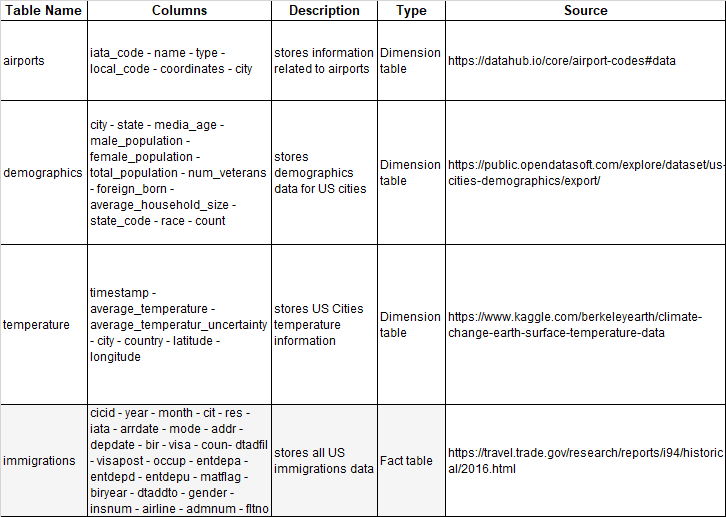

## Complete Project Write Up

* Clearly state the rationale for the choice of tools and technologies for the project.

    *I used panda’s library from python since it can easily handle multiple file formats (SAS, csv, etc) that contain large amounts of data. 
	PostgreSQL and SQL commands were used to process for creating of tables in PostgreSQL Database and  join operations to create the tables.
    * The following Technologies I have used:-
        1. Jupyter Notebook version 5.4.0
        2. Python version 3.9
        3. PostgreSQL version 12


* Propose how often the data should be updated and why.

    *Since the format of the raw files are monthly, we should continue pulling the data monthly.

* Write a description of how you would approach the problem differently under the following scenarios:
 * The data was increased by 100x.
   * Use Amazon Redshift: It is an analytical database that is optimized for aggregation and read-heavy workloads.
 * The data populates a dashboard that must be updated on a daily basis by 7am every day.
   * Airflow can be used here, create DAG retries or send emails on failures. Have daily quality checks; if fail, send emails to operators and freeze dashboards.
 * The database needed to be accessed by 100+ people.
   * Redshift can help us here since it has auto-scaling capabilities and good read performance.